<h1 style="color:black" align="center"> Data Science Capstone project </h1>

<h2 style="color:black" align="center"> Microsoft Professional Programme in Data Science  </h2>

<h2 style="color:black" align="left"> Title: Predicting Mortgage Rates From Government Data</h2>
 

<h3 style="color:black" align="left"> Author: Oguzhan San </h3>
<h3 style="color:black" align="left"> Date: November, 2019 </h3>

This Capstone project is the challenge set by Microsoft after completed 10+ require modules for the Microsoft Professional Programme (MPP) in Datascience.

The project considers how demographics, location, property type, lender, and other factors are related to predict mortgage rates across the United States.(https://datasciencecapstone.org/competitions/18/mortgage-rates-from-government-data/page/55/).

### Importing the Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from catboost import  CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score
%matplotlib inline
sns.set()

Using TensorFlow backend.


### Importing Datasets

In [4]:
#Importing train values, train labels and test values
train_values = pd.read_csv("train_values.csv")
train_labels = pd.read_csv("train_labels.csv")
test_values = pd.read_csv("test_values.csv")


In [5]:
train_values.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,189292.000000,198005.000000,198005.000000,198015.000000,197977.000000,197988.000000,197984.000000,200000.000000
mean,99999.500000,1.570935,1.154880,1.482605,1.061385,142.574940,2.702950,226.974970,28.202045,166.335230,...,4.762685,1.417540,73.617902,5391.099099,34.238640,64595.355801,89.283022,1402.872401,1927.336618,2001.311505
std,57735.171256,0.559410,0.365066,0.822156,0.246043,142.559487,0.545658,106.655259,15.593383,92.852518,...,0.887328,0.577133,105.696934,2669.028807,27.930882,12724.514485,15.059223,706.880410,886.576586,1271.134197
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,1.000000,7.000000,0.326000,17860.000000,6.193000,3.000000,6.000000,0.000000
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,67.000000,2.000000,154.000000,14.000000,83.000000,...,5.000000,1.000000,39.000000,3717.000000,10.928000,56654.000000,81.648000,932.000000,1344.000000,963.000000
50%,99999.500000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,181.000000,...,5.000000,1.000000,56.000000,4959.000000,25.996000,63485.000000,98.959000,1304.000000,1799.000000,1834.000000
75%,149999.250000,2.000000,1.000000,2.000000,1.000000,179.000000,3.000000,318.000000,41.000000,249.000000,...,5.000000,2.000000,83.000000,6470.000000,52.000000,71238.000000,100.000000,1742.000000,2353.000000,3180.000000
max,199999.000000,4.000000,3.000000,3.000000,3.000000,11104.000000,3.000000,408.000000,52.000000,316.000000,...,7.000000,4.000000,10042.000000,34126.000000,100.000000,125095.000000,100.000000,8747.000000,13615.000000,4283.000000


In [6]:
test_values.describe(include="all")

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,189629.000000,198082.000000,198080.000000,198095.000000,198054.000000,198067.000000,198067.000000,200000.000000,200000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123338
mean,99999.500000,1.569510,1.155060,1.481305,1.061130,142.952260,2.702795,226.872515,28.174960,166.501625,...,1.415725,74.049861,5388.959572,34.065199,64611.340922,89.254531,1404.372763,1930.204895,2009.081340,NaN
std,57735.171256,0.560963,0.365017,0.820990,0.246015,145.685382,0.545001,106.492733,15.592002,92.711275,...,0.575143,108.510452,2647.919989,27.891696,12742.878011,15.095623,705.304129,884.157258,1271.022425,NaN
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,...,1.000000,1.000000,6.000000,0.312000,17883.000000,6.320000,6.000000,1.000000,0.000000,NaN
25%,49999.750000,1.000000,1.000000,1.000000,1.000000,66.000000,2.000000,154.000000,14.000000,83.000000,...,1.000000,39.000000,3725.250000,10.789750,56655.000000,81.619250,933.000000,1347.000000,973.000000,NaN
50%,99999.500000,2.000000,1.000000,1.000000,1.000000,116.000000,3.000000,261.000000,30.000000,181.000000,...,1.000000,56.000000,4964.000000,25.629500,63499.000000,98.911500,1307.000000,1803.000000,1866.000000,NaN
75%,149999.250000,2.000000,1.000000,2.000000,1.000000,178.000000,3.000000,317.000000,41.000000,249.000000,...,2.000000,83.000000,6463.000000,51.780250,71288.000000,100.000000,1743.000000,2356.000000,3180.000000,NaN


### Check for class balance

It can be seen that the data have equal classes for the label.

In [7]:
# variable names
train_values.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')

In [8]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
row_id                            200000 non-null int64
loan_type                         200000 non-null int64
property_type                     200000 non-null int64
loan_purpose                      200000 non-null int64
occupancy                         200000 non-null int64
loan_amount                       200000 non-null float64
preapproval                       200000 non-null int64
msa_md                            200000 non-null int64
state_code                        200000 non-null int64
county_code                       200000 non-null int64
applicant_ethnicity               200000 non-null int64
applicant_race                    200000 non-null int64
applicant_sex                     200000 non-null int64
applicant_income                  189292 non-null float64
population                        198005 non-null float64
minority_population_pct           198005 no

In [12]:
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
row_id                            200000 non-null int64
loan_type                         200000 non-null int64
property_type                     200000 non-null int64
loan_purpose                      200000 non-null int64
occupancy                         200000 non-null int64
loan_amount                       200000 non-null float64
preapproval                       200000 non-null int64
msa_md                            200000 non-null int64
state_code                        200000 non-null int64
county_code                       200000 non-null int64
applicant_ethnicity               200000 non-null int64
applicant_race                    200000 non-null int64
applicant_sex                     200000 non-null int64
applicant_income                  189629 non-null float64
population                        198082 non-null float64
minority_population_pct           198080 no

In [13]:
train.shape

(200000, 23)

The dataset has 21 features and target variable as rate spread 


In [11]:
train = train_values.copy()
train = pd.merge(train,train_labels, on="row_id") #Merging train values and targets

In [ ]:
train.head(10)

### Data Exploration

In [10]:
train.loan_amount.describe() # In thousands of dollars

count    200000.000000
mean        142.574940
std         142.559487
min           1.000000
25%          67.000000
50%         116.000000
75%         179.000000
max       11104.000000
Name: loan_amount, dtype: float64

The loan amount varies from $\$1,000$ to $\$11,104,000$ while the average and the standard division loan amount is $\$143.000$ which most of the values are below $\$500.000$. The distribution of the loan amount is left-skewed as can be seen in the graph below.

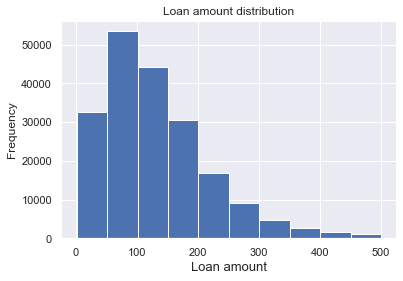

In [11]:
train.loc[train.loan_amount <= 500, 'loan_amount'].plot(kind = 'hist')
plt.title("Loan amount distribution")
plt.xlabel('Loan amount', fontsize = 13);

1:Hispanic   2:Not Hispanic    3:No Information   4:No co-applicant


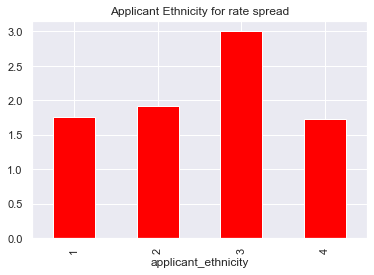

In [12]:
train.groupby('applicant_ethnicity')['rate_spread'].mean().plot(kind="bar", color = "red")
plt.title("Applicant Ethnicity for rate spread")
print("1:Hispanic   2:Not Hispanic    3:No Information   4:No co-applicant")

1:One to Four Family   2:Manufactured housing    3:Multifamily


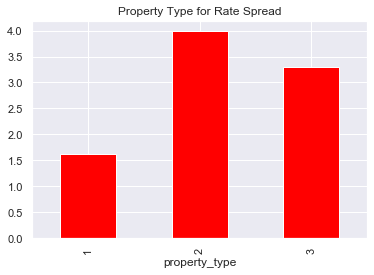

In [15]:
train.groupby('property_type')['rate_spread'].mean().plot(kind="bar", color = "red")
plt.title("Property Type for Rate Spread")
print("1:One to Four Family   2:Manufactured housing    3:Multifamily")

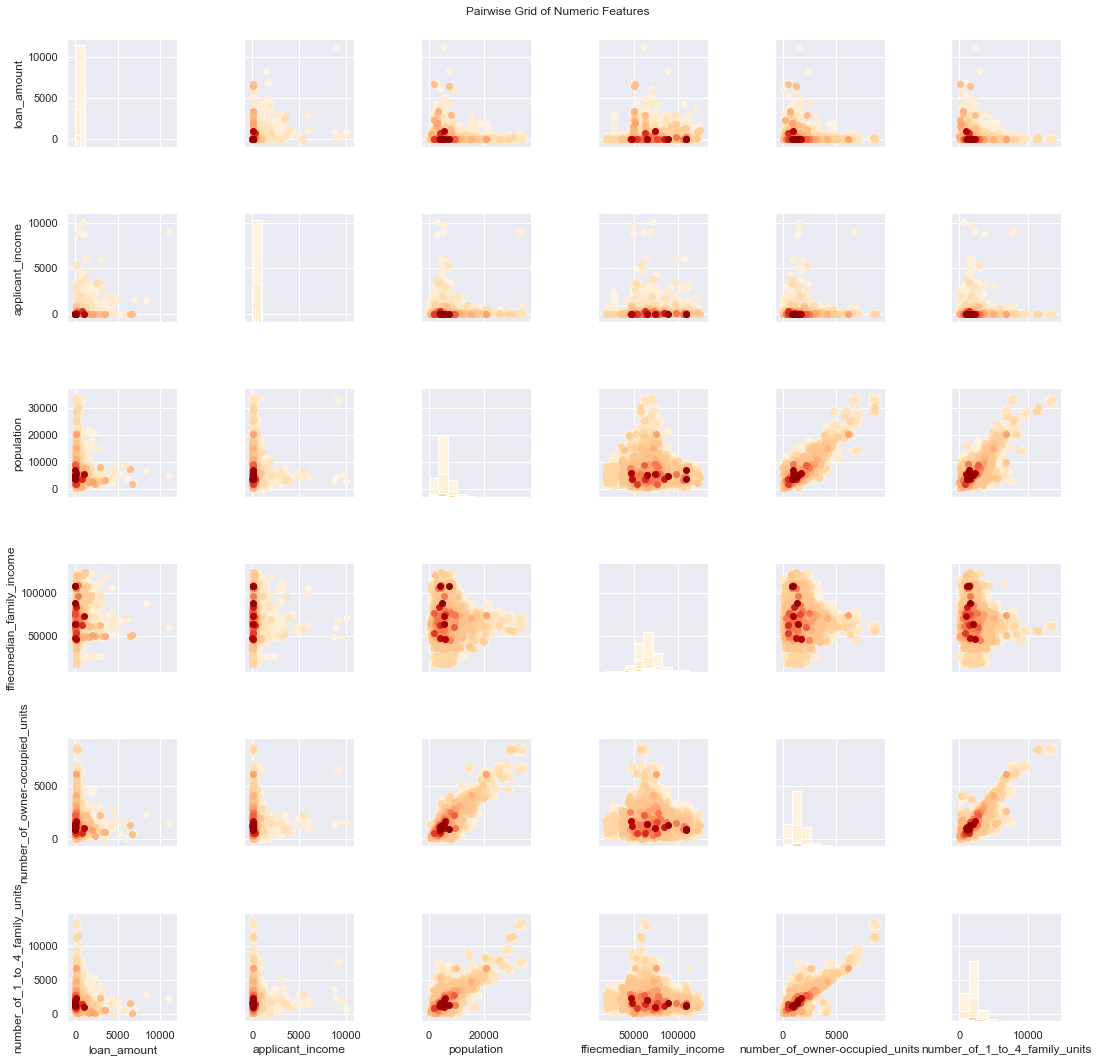

In [32]:
# Pair grid of key variables.
g = sns.PairGrid(train, vars=["loan_amount", "applicant_income", "population","ffiecmedian_family_income", 
                           "number_of_owner-occupied_units", "number_of_1_to_4_family_units"], 
                 palette='OrRd', hue='rate_spread')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

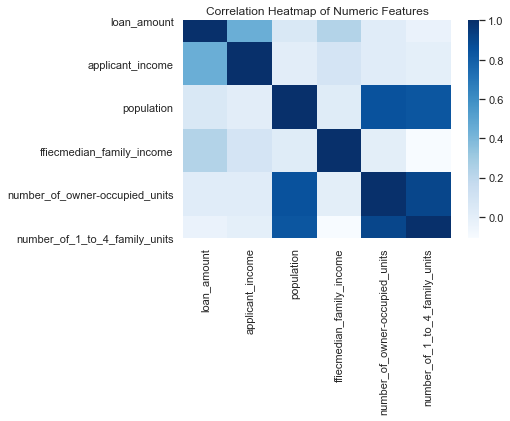

In [17]:
train_numerical = train[["loan_amount", "applicant_income", "population","ffiecmedian_family_income",
                         "number_of_owner-occupied_units", "number_of_1_to_4_family_units"]]
corr = train_numerical.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features');

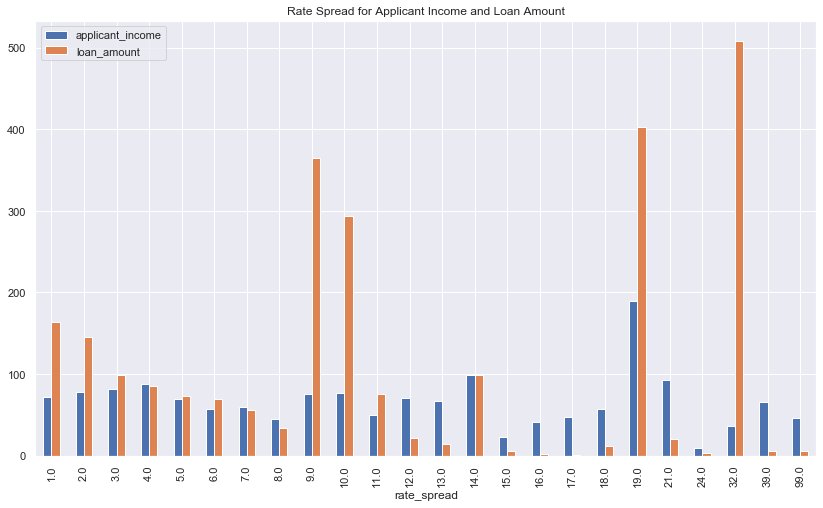

In [18]:
train[['applicant_income', 'loan_amount','rate_spread']].groupby(['rate_spread']).mean().plot(kind='bar', figsize=(14, 8), title='Rate Spread for Applicant Income and Loan Amount');

In [19]:
train.select_dtypes(include = ['float64']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amount,200000.0,142.574940,142.559487,1.000,67.000,116.000,179.0,11104.0
applicant_income,189292.0,73.617902,105.696934,1.000,39.000,56.000,83.0,10042.0
population,198005.0,5391.099099,2669.028807,7.000,3717.000,4959.000,6470.0,34126.0
minority_population_pct,198005.0,34.238640,27.930882,0.326,10.928,25.996,52.0,100.0
ffiecmedian_family_income,198015.0,64595.355801,12724.514485,17860.000,56654.000,63485.000,71238.0,125095.0
tract_to_msa_md_income_pct,197977.0,89.283022,15.059223,6.193,81.648,98.959,100.0,100.0
number_of_owner-occupied_units,197988.0,1402.872401,706.880410,3.000,932.000,1304.000,1742.0,8747.0
number_of_1_to_4_family_units,197984.0,1927.336618,886.576586,6.000,1344.000,1799.000,2353.0,13615.0
rate_spread,200000.0,1.979110,1.656809,1.000,1.000,1.000,2.0,99.0


In [20]:
train[train.rate_spread < 8].select_dtypes(include = ['float64', 'int64']).groupby('rate_spread').agg(['count', 'mean']).transpose()

rate_spread                                     1.0           2.0  \
row_id                         count  115091.000000  43464.000000   
                               mean   100042.588065  99760.575833   
loan_type                      count  115091.000000  43464.000000   
                               mean        1.750962      1.529243   
property_type                  count  115091.000000  43464.000000   
                               mean        1.047206      1.122354   
loan_purpose                   count  115091.000000  43464.000000   
                               mean        1.436933      1.505683   
occupancy                      count  115091.000000  43464.000000   
                               mean        1.053314      1.067803   
loan_amount                    count  115091.000000  43464.000000   
                               mean      163.955114    145.047465   
preapproval                    count  115091.000000  43464.000000   
                               mean        2.631535      2.685924   
msa_md                         count  115091.000000  43464.000000   
                               mean      223.570627    231.753566   
state_code                     count  115091.000000  43464.000000   
                               mean       28.421466     28.485045   
county_code                    count  115091.000000  43464.000000   
                               mean      166.020471    164.509295   
applicant_ethnicity            count  115091.000000  43464.000000   
                               mean        1.873465      1.887677   
applicant_race                 count  115091.000000  43464.000000   
                               mean        4.750510      4.725888   
applicant_sex                  count  115091.000000  43464.000000   
                               mean        1.417974      1.399871   
applicant_income               count  108409.000000  41648.000000   
                               mean       72.167200     78.080628   
population                     count  114494.000000  43033.000000   
                               mean     5487.898658   5317.818906   
minority_population_pct        count  114494.000000  43033.000000   
                               mean       36.050548     34.456062   
ffiecmedian_family_income      count  114498.000000  43035.000000   
                               mean    65610.418400  63713.745324   
tract_to_msa_md_income_pct     count  114480.000000  43021.000000   
                               mean       89.183811     88.818493   
number_of_owner-occupied_units count  114486.000000  43027.000000   
                               mean     1404.078237   1392.166384   
number_of_1_to_4_family_units  count  114483.000000  43026.000000   
                               mean     1912.663793   1934.511319   
lender                         count  115091.000000  43464.000000   
                               mean     2057.595981   2095.097552   

rate_spread                                    3.0            4.0  \
row_id                         count  13663.000000    8292.000000   
                               mean   99449.207787  100480.975639   
loan_type                      count  13663.000000    8292.000000   
                               mean       1.161678       1.058611   
property_type                  count  13663.000000    8292.000000   
                               mean       1.275562       1.361553   
loan_purpose                   count  13663.000000    8292.000000   
                               mean       1.782039       1.758080   
occupancy                      count  13663.000000    8292.000000   
                               mean       1.079924       1.103835   
loan_amount                    count  13663.000000    8292.000000   
                               mean      98.640855      85.080077   
preapproval                    count  13663.000000    8292.000000   
                               mean       2.886482       2.903763 



<h2 style="color:black">EDA on property location</h2>

Property location features have the following characteristics:
- msa md
- state code
- county code

in which $-1$ represented a missing value. A contingency table of the relationship between mortgage rate spread and property location feature is shown below:

In [34]:
pd.crosstab(train.rate_spread, train.msa_md)

msa_md,0,1,2,3,4,5,6,7,8,9,...,399,400,401,402,403,404,405,406,407,408
rate_spread,,,,,,,,,,,,,,,,,,,,,
1.0,34,165,354,84,47,67,62,634,402,36,...,106,35,160,82,233,1125,76,153,71,43
2.0,16,43,64,33,27,22,35,138,172,7,...,23,8,39,42,51,360,21,31,53,26
3.0,9,9,9,7,5,1,15,87,89,2,...,6,5,6,11,13,80,7,30,16,14
4.0,10,6,11,3,4,0,4,14,31,1,...,0,8,7,11,10,46,2,18,6,4
5.0,5,6,10,3,2,1,3,17,51,1,...,1,14,3,1,7,59,7,7,4,3
6.0,3,0,3,1,2,2,4,28,95,1,...,1,3,5,2,4,34,15,9,10,8
7.0,3,0,5,0,0,1,3,5,15,0,...,0,2,1,1,2,18,2,3,4,1
8.0,1,5,1,1,0,0,2,7,36,0,...,0,1,0,0,2,11,6,10,0,2
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0


There are 402 different Metropolitan Statistical Area/Metropolitan Division and each of them have different rate of mortgage spread approval.

In [35]:
pd.crosstab(train.rate_spread, train.state_code)

state_code,0,1,2,3,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
rate_spread,,,,,,,,,,,,,,,,,,,,,
1.0,2868,2537,1814,3418,72,649,2593,148,1530,1555,...,577,1094,1446,2969,514,13171,200,4812,927,63
2.0,1440,1357,1185,988,47,147,682,158,526,297,...,371,421,368,543,74,6841,32,1449,535,23
3.0,323,531,573,156,45,137,293,101,124,114,...,93,141,319,157,52,1615,134,439,164,16
4.0,162,294,455,137,9,60,227,53,96,78,...,31,100,46,129,21,1129,50,287,65,4
5.0,146,185,371,140,12,35,209,16,55,24,...,28,55,64,82,19,947,19,235,51,1
6.0,479,311,401,139,3,23,85,16,32,46,...,28,34,79,48,12,1365,9,179,28,6
7.0,38,50,99,54,0,15,49,3,19,22,...,0,21,28,23,2,313,22,300,25,0
8.0,27,80,139,51,2,2,49,8,5,46,...,0,23,17,11,2,389,4,198,10,0
9.0,0,1,1,1,1,1,2,1,1,0,...,0,6,0,1,0,3,0,2,3,0


<h2 style="color:black">EDA of other categorical features</h2>



In [36]:
# Cross tabulation of loan accepted and lender
pd.crosstab(train.rate_spread, train.lender)

lender,0,1,2,3,4,5,6,7,8,9,...,4274,4275,4276,4277,4278,4279,4280,4281,4282,4283
rate_spread,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,11,17,4,6,1,2,2011,25,...,139,7,13,12,23,1,0,2,37,9
2.0,1,0,5,0,8,13,0,2,339,1,...,13,2,48,1,4,0,1,2,43,0
3.0,0,0,0,0,10,0,1,2,3,0,...,0,3,2,0,0,0,0,0,15,0
4.0,0,0,0,0,2,1,1,2,0,0,...,0,0,0,0,0,0,0,0,2,0
5.0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,2,0
6.0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
7.0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
8.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 6509 lenders that are authorized in approving or denying mortgage loan applications.

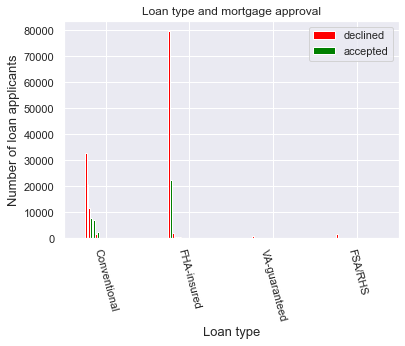

In [37]:
# visualization of loan accepted and loan type
pd.crosstab(train.loan_type, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Loan type and mortgage approval')
plt.xlabel('Loan type', fontsize = 13)
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Conventional', 'FHA-insured', 'VA-guaranteed', 'FSA/RHS' ], rotation = -75)
plt.legend(['declined', 'accepted']);

Loan type indicates whether the loan granted, applied for, or purchased was conventional, government-guaranteed, or government-insured. Conventional loan type is alway common in the mortgage loan application. From the above chart analysis there seem no impact of loan type on approval of morgage loan applications.



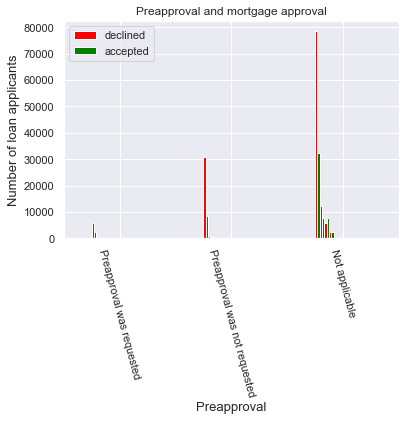

In [38]:
# visualization of loan accepted and preapproval
pd.crosstab(train.preapproval, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Preapproval and mortgage approval')
plt.xlabel('Preapproval', fontsize = 13)
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xticks([0, 1, 2], ['Preapproval was requested', 'Preapproval was not requested', 'Not applicable'], rotation = -75)
plt.legend(['declined', 'accepted']);


Preapproval indicate whether the application or loan involved a request for a pre-approval of a home purchase loan. It can be seen from the chart that there are fewer cases of  preapproval 1 and 2 for mortgage loan application and that may make the feature not to be importance in the model prediction.

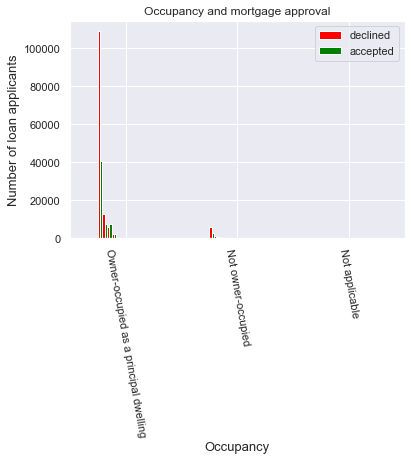

In [40]:
# visualization of loan accepted and occupancy
pd.crosstab(train.occupancy, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Occupancy and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Occupancy', fontsize = 13)
plt.xticks([0, 1, 2], ['Owner-occupied as a principal dwelling', 'Not owner-occupied', 'Not applicable'], rotation = -80)
plt.legend(['declined', 'accepted']);

Occupancy indicates whether the property to which the loan application relates will be the owner's principal dwelling. Owner-occupied as a principal dwelling is common in the mortgage loan application.

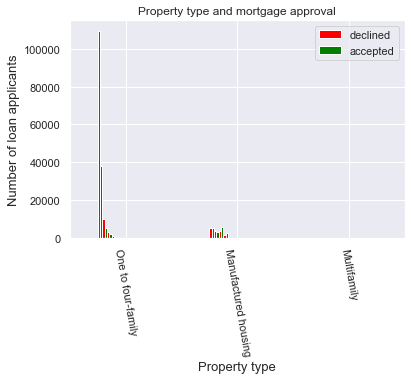

In [41]:
# visualization of loan accepted and property type
pd.crosstab(train.property_type, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Property type and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Property type', fontsize = 13)
plt.xticks([0, 1, 2], ['One to four-family', 'Manufactured housing', 'Multifamily'], rotation = -80)
plt.legend(['declined', 'accepted']);

Property type indicates whether the loan or application was for a one-to-four-family dwelling (other than manufactured housing), manufactured housing, or multifamily dwelling. The most common property type is one-to-four-family dwelling.

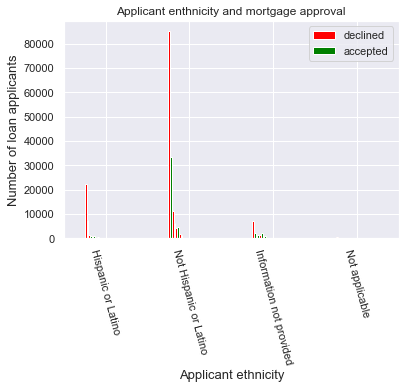

In [42]:
# visualization of loan accepted and applicant ethnicity
pd.crosstab(train.applicant_ethnicity, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Applicant enthnicity and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Applicant ethnicity', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Hispanic or Latino', 'Not Hispanic or Latino', 'Information not provided', 'Not applicable', 'No co-applicant' ], rotation = -75)
plt.legend(['declined', 'accepted']);

Applicant's race has significant impact on the mortgage loan approval. Applicant whose race is white as the chance of loan approval compare to other race.

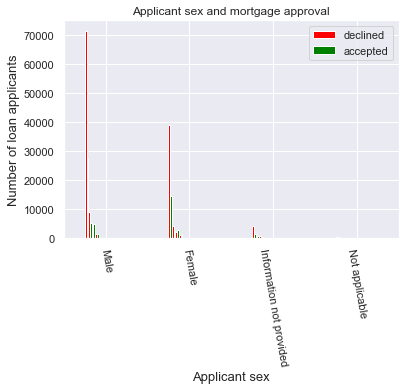

In [45]:
pd.crosstab(train.applicant_sex, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Applicant sex and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Applicant sex', fontsize = 13)
plt.xticks([0, 1, 2, 3], ['Male', 'Female', 'Information not provided', 'Not applicable'], rotation = -80)
plt.legend(['declined', 'accepted']);

Male applicants are most common on the mortgage loan applications.

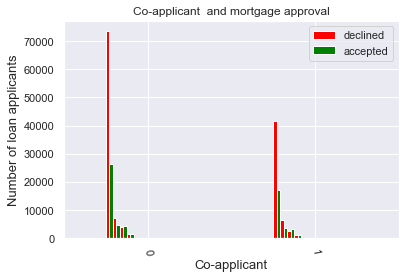

In [47]:
pd.crosstab(train.co_applicant, train.rate_spread).plot(kind = 'bar', color = ['red', 'green'], title = 'Co-applicant  and mortgage approval')
plt.ylabel('Number of loan applicants', fontsize = 13)
plt.xlabel('Co-applicant', fontsize = 13)
plt.xticks(rotation = -80)
plt.legend(['declined', 'accepted']);



<h2 style="color:black">Exploratory data analysis on the continuous features</h2>

In [50]:
train.select_dtypes(include = ['float64']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amount,200000.0,142.574940,142.559487,1.000,67.00000,116.0000,179.000,11104.0
applicant_income,200000.0,73.617902,102.828490,1.000,40.00000,59.0000,80.000,10042.0
population,200000.0,5391.099099,2655.683596,7.000,3730.00000,4986.0000,6450.000,34126.0
minority_population_pct,200000.0,34.238640,27.791227,0.326,11.04700,26.3570,51.641,100.0
ffiecmedian_family_income,200000.0,64595.355801,12661.211303,17860.000,56763.00000,63609.0000,71176.000,125095.0
tract_to_msa_md_income_pct,200000.0,89.283022,14.982867,6.193,81.84675,98.6185,100.000,100.0
number_of_owner-occupied_units,200000.0,1402.872401,703.315796,3.000,936.00000,1311.0000,1736.000,8747.0
number_of_1_to_4_family_units,200000.0,1927.336618,882.096901,6.000,1348.00000,1808.0000,2345.000,13615.0
rate_spread,200000.0,1.979110,1.656809,1.000,1.00000,1.0000,2.000,99.0


The table is the descriptive statistics for the continuous features in the mortgage loan applications data. From the table we have the five number summary and quartile values.

In [51]:
train.select_dtypes(include = ['float64', 'int64']).groupby('rate_spread').agg(['count', 'mean']).transpose()

rate_spread                                    1.0           2.0   \
row_id                         count  115091.000000  43464.000000   
                               mean   100042.588065  99760.575833   
loan_amount                    count  115091.000000  43464.000000   
                               mean      163.955114    145.047465   
applicant_income               count  115091.000000  43464.000000   
                               mean       72.251426     77.894168   
population                     count  115091.000000  43464.000000   
                               mean     5487.396540   5318.545571   
minority_population_pct        count  115091.000000  43464.000000   
                               mean       36.041149     34.453906   
ffiecmedian_family_income      count  115091.000000  43464.000000   
                               mean    65605.188347  63722.447028   
tract_to_msa_md_income_pct     count  115091.000000  43464.000000   
                               mean       89.184337     88.823227   
number_of_owner-occupied_units count  115091.000000  43464.000000   
                               mean     1404.071898   1392.274025   
number_of_1_to_4_family_units  count  115091.000000  43464.000000   
                               mean     1912.741306   1934.439017   
co_applicant                   count  115091.000000  43464.000000   
                               mean        0.360767      0.393268   

rate_spread                                   3.0            4.0   \
row_id                         count  13663.000000    8292.000000   
                               mean   99449.207787  100480.975639   
loan_amount                    count  13663.000000    8292.000000   
                               mean      98.640855      85.080077   
applicant_income               count  13663.000000    8292.000000   
                               mean      81.732081      87.269965   
population                     count  13663.000000    8292.000000   
                               mean    5143.573135    5201.371921   
minority_population_pct        count  13663.000000    8292.000000   
                               mean      26.846539      28.593143   
ffiecmedian_family_income      count  13663.000000    8292.000000   
                               mean   63070.001410   64062.841571   
tract_to_msa_md_income_pct     count  13663.000000    8292.000000   
                               mean      90.553262      90.640023   
number_of_owner-occupied_units count  13663.000000    8292.000000   
                               mean    1406.940663    1401.859123   
number_of_1_to_4_family_units  count  13663.000000    8292.000000   
                               mean    1956.311102    1919.058831   
co_applicant                   count  13663.000000    8292.000000   
                               mean       0.471858       0.431138   

rate_spread                                    5.0            6.0   \
row_id                         count    6353.000000    7854.000000   
                               mean   100458.041083  100254.116756   
loan_amount                    count    6353.000000    7854.000000   
                               mean       72.985833      69.907690   
applicant_income               count    6353.000000    7854.000000   
                               mean       70.181814      58.119350   
population                     count    6353.000000    7854.000000   
                               mean     5209.745842    5233.961789   
minority_population_pct        count    6353.000000    7854.000000   
                               mean       31.511001      31.074793   
ffiecmedian_family_income      count    6353.000000    7854.000000   
                               mean    62937.670882   60399.807957   
tract_to_msa_md_income_pct     count    6353.000000    7854.000000   
                               mean       89.744625      89.294297   
number_of_owner-occupied_units count    6353.00000

**Conclusion**

* It can be seen that the average mortgage loan amount requested is higher for loan applications that are accepted when compare to the ones that are declined.


* Applicant who has much income is likely to be given a mortgage loan when compare to the one that has less.




### Data Preprocessing for Model

In [21]:
convert_dict = {'loan_type': 'category', 'property_type':'category', 'loan_purpose': 'category', 'occupancy': 'category',
        'preapproval': 'category', 'msa_md': 'category', 'state_code': 'category', 'county_code': 'category',
       'applicant_ethnicity': 'category', 'applicant_race': 'category', 'applicant_sex': 'category',
       'lender': 'category', 'co_applicant': 'bool'}

train = train.astype(convert_dict)
train.dtypes

row_id                               int64
loan_type                         category
property_type                     category
loan_purpose                      category
occupancy                         category
loan_amount                        float64
preapproval                       category
msa_md                            category
state_code                        category
county_code                       category
applicant_ethnicity               category
applicant_race                    category
applicant_sex                     category
applicant_income                   float64
population                         float64
minority_population_pct            float64
ffiecmedian_family_income          float64
tract_to_msa_md_income_pct         float64
number_of_owner-occupied_units     float64
number_of_1_to_4_family_units      float64
lender                            category
co_applicant                          bool
rate_spread                        float64
dtype: obje

In [22]:
test_values = test_values.astype(convert_dict)
test_values.dtypes

row_id                               int64
loan_type                         category
property_type                     category
loan_purpose                      category
occupancy                         category
loan_amount                        float64
preapproval                       category
msa_md                            category
state_code                        category
county_code                       category
applicant_ethnicity               category
applicant_race                    category
applicant_sex                     category
applicant_income                   float64
population                         float64
minority_population_pct            float64
ffiecmedian_family_income          float64
tract_to_msa_md_income_pct         float64
number_of_owner-occupied_units     float64
number_of_1_to_4_family_units      float64
lender                            category
co_applicant                          bool
dtype: object

In [23]:
column = {'msa_md': -1,
        'state_code': -1,
        'county_code': -1}

#Checking the missing values

train.replace(column, np.nan, inplace = True)
test_values.replace(column, np.nan, inplace=True)

In [24]:
# Checking variables that have missing values
train.isna().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                         1338
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  10708
population                         1995
minority_population_pct            1995
ffiecmedian_family_income          1985
tract_to_msa_md_income_pct         2023
number_of_owner-occupied_units     2012
number_of_1_to_4_family_units      2016
lender                                0
co_applicant                          0
rate_spread                           0
dtype: int64


<h2 style="color:black"> Data imputation of missing values</h2>

* state_code has 1338(0.6%) missing values
* applicant_income  has 10708(5.3%) missing values
* population has 1995(0.9%) missing values
* minority_population_pct has 1995(0.9%) missing values
* ffiecmedian_family_income has 1985(0.9%) missing values
* tract_to_msa_md_income_pct has 2023(1%) missing values
* number_of_owner-occupied_units has 2012(1%) missing values
* number_of_1_to_4_family_units has 2016(1%) missing values

In [25]:
test_values.isna().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                         1229
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  10371
population                         1918
minority_population_pct            1920
ffiecmedian_family_income          1905
tract_to_msa_md_income_pct         1946
number_of_owner-occupied_units     1933
number_of_1_to_4_family_units      1933
lender                                0
co_applicant                          0
dtype: int64

In [26]:
def nafill(df, columns):
    for col in columns:
        if (col == 'state_code') & (df[col].isna().sum() > 0):
            df[col] = df[col].fillna(method="pad")
        elif (col != 'state_code') & (df[col].isna().sum() > 0):
            df[col] = df[col].fillna(value=np.mean(df[col]))
    return df
        

In [27]:
columns = ["state_code","applicant_income", "population", "minority_population_pct", "ffiecmedian_family_income", "tract_to_msa_md_income_pct", "number_of_owner-occupied_units", "number_of_1_to_4_family_units"]
test_clean = nafill(test_values, columns)
train_clean = nafill(train, columns)

In [28]:
train_clean["co_applicant"] = train_clean.co_applicant.astype(int)
test_clean["co_applicant"] = test_clean.co_applicant.astype(int)

In [29]:
scaler = StandardScaler() #Scaling the data

In [30]:
scaled_features_train = train_clean.copy()
scaled_features_test = test_clean.copy()

In [31]:
col_names = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct',
             'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units',
            'number_of_1_to_4_family_units', 'co_applicant']
features_train = scaled_features_train[col_names]
features_test = scaled_features_test[col_names]
scaler = StandardScaler().fit(features_train.values)
features_train = scaler.transform(features_train.values)
features_train = scaler.transform(features_test.values)
scaled_features_train[col_names] = features_train
scaled_features_test[col_names] = features_test

## Machine Learning Model

### CatBoost Model

CatBoost is a machine learning algorithm that handle categorical (CAT) data automatically. The model derives its name from the word Category and Boosting. It is a model that works well with multiple categories of learning problem such as classification and regression.

## Advantages of CatBoost model

* **Performance**: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front. 

Before I finally decided to use CatBoost model, I tried different machine learning models that are linear or non linear. The models I trained with HMDA data that have 500,000 rows and 21 features are Neura network with 65% accuracy, Adaboost with $63\%$ accuracy, LDA with $64\%$ accuracy, logistic regression with $64\%$ accuracy, KNN with $62\%$ accuracy, and finally CatBoost model with $72.8\%$ accuracy.

* **Handling Categorical features automatically**: We can use CatBoost without any explicit pre-processing (one hot encoding) to convert categories into numeric. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.

HMDA data is a categorical based data. We have 13 different categorical features and if we create a one hot encoding for all this features, there will be a curse of dimensionality for some models such as KNN and the models we are training will not generalize well.

* **Robust**: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models.

CatBoost model with default hyper - parameters generalize well

* **Time and speed**: Running time of Catboost model is not expensive.

Running Catboost on HMDA took 2h 22mins (on 5000 iterations) while KNN took 5 days.

In [ ]:
X = scaled_features_train.drop('rate_spread', axis = 'columns')
y = scaled_features_train.rate_spread

In [26]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 20])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42, shuffle=True)

In [28]:
cat_model = CatBoostClassifier(iterations = 500, depth = 6, learning_rate = 0.5,  eval_metric = 'Accuracy', 
                               use_best_model = True, random_seed=42, verbose=False, l2_leaf_reg = 6.0)

In [29]:
%time cat_model.fit(X_train, y_train, cat_features = categorical_features_indices, eval_set = (X_test, y_test), plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 1d 58s, sys: 19min 28s, total: 1d 20min 26s
Wall time: 3h 11min 19s


In [208]:
predictions = cat_model.predict(X_test)
print('The test accuracy is: {:.3f}'.format(accuracy_score(y_test, predictions)))

The test accuracy is: 0.688


In [194]:
feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified = True), columns = ['Features', 'Importances'])
feature_importance['Features'] = X.columns
feature_importance.drop(0, axis=0, inplace=True)
feature_importance
#Checking the Feature importance

,Features,Importances
1,loan_type,11.638246
2,property_type,8.423405
3,loan_purpose,7.781885
4,occupancy,6.312066
5,loan_amount,5.440584
6,preapproval,3.901008
7,msa_md,3.017007
8,state_code,2.464302
9,county_code,2.236660
10,applicant_ethnicity,2.146826


In [76]:
print('Sensitivity:', round(recall_score(y_test, predictions, average="weighted"), 2))

Sensitivity: 0.69


In [77]:
y_predictions_model = cat_model.predict(scaled_features_test)

# Submission to DrivenData website

In [79]:
# Submission file 
submission = pd.read_csv('../Capstone project/submission_format.csv')

submission = submission.iloc[:, 0]

file = {'row_id': submission, 'rate_spread': y_predictions_model.astype('int64')}

submission_format = pd.DataFrame(submission, columns = ['row_id'])

In [80]:
submission_format["rate_spread"] = y_predictions_model.astype('float64')

In [81]:
submission_format.head()

,row_id,rate_spread
0,0,6.0
1,1,2.0
2,2,2.0
3,3,2.0
4,4,1.0


In [82]:
# Submit file to be sent to submission folder
submission_format.to_csv('submission_cat_model24.csv', index = False)

# Conclusion

This analysis has shown that spread rate of mortgage applications can be predicted from its characteristics. From the model, we noticed that lender, applicant income, loan purpose, loan amount and county code have a significant effect on the approval of mortgage applications.

The Github repository can be found [here](https://github.com/sanoguzhan/Microsoft-Professional-Program)